# Importing All Necessary Libraries and Loading the Dataset

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer


In [313]:
pd.set_option("display.max_columns", None)
mlrcare = pd.read_excel("Downloads/Final_malaria.xlsx", sheet_name = 0)
mlrdiag = pd.read_excel("Downloads/Final_malaria.xlsx", sheet_name = 1)
mlract = pd.read_excel("Downloads/Final_malaria.xlsx", sheet_name = 2)

* MLRCARE - Careseeking for children under age 5 with fever-Percentage of children (under age 5) with fever for whom advice or treatment was sought.
* MLRDIAG - Malaria Diagnostics Usage-Percentage of febrile children (under age 5) who had a finger or heel stick for malaria testing.
* MLRACT - First-line treatment (ACT) for children under age 5 with fever-Percentage of febrile children (under age 5) receiving ACT (first-line antimalarial drug), among those receiving any antimalarial drugs.

# MLRCARE

In [314]:
mlrcare

,ISO,Countries,UNICEF Reporting region,UNICEF Programme Region,World Bank Income Group (2022),Year,Short Source,Long Source,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,63.2,NaN,NaN,62.3,65.9,61.1,62.0,61.1,67.7,64.1,NaN,NaN,NaN
1,AFG,Afghanistan,South Asia,ROSA,Low income,2018,Afghanistan Health Survey 2018,Afghanistan Health Survey 2018. Amsterdam: KIT...,62.1,60.9,63.2,63.1,59.5,56.6,67.2,59.9,63.5,63.6,60.9,66.1,NaN
2,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2016,DHS 2015-2016,Demographic and Health Survey 2015-2016,50.8,51.0,50.5,42.6,57.1,36.9,47.3,56.7,59.7,63.3,NaN,NaN,NaN
3,ALB,Albania,Eastern Europe and Central Asia,ECARO,Upper middle income,2009,DHS 2008-2009,Demographic and Health Survey 2008-2009,71.2,80.9,60.7,69.6,73.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,Albania,Eastern Europe and Central Asia,ECARO,Upper middle income,2018,DHS 2017-2018,Demographic and Health Survey 2017-2018,59.6,60.8,58.3,53.6,66.9,44.3,66.3,63.6,NaN,NaN,NaN,54.0,63.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,ZAF,South Africa,Eastern and Southern Africa,ESARO,Upper middle income,2016,DHS 2016,Demographic and Health Survey 2016,68.4,69.0,67.7,63.7,70.8,64.0,67.3,68.6,69.3,73.3,NaN,NaN,NaN
203,ZMB,Zambia,Eastern and Southern Africa,ESARO,Low income,2014,DHS 2013-2014,Demographic and Health Survey 2013-2014,74.9,75.9,73.9,72.9,79.4,70.1,75.7,75.0,79.6,77.1,NaN,NaN,NaN
204,ZMB,Zambia,Eastern and Southern Africa,ESARO,Low income,2019,DHS 2018-2019,Demographic and Health Survey 2018-2019,77.2,79.4,74.9,77.7,75.9,73.6,79.4,84.2,75.4,75.7,77.5,75.0,80.6
205,ZWE,Zimbabwe,Eastern and Southern Africa,ESARO,Lower middle income,2014,MICS 2014,Multiple Indicator Cluster Survey 2014,47.1,46.6,47.5,48.1,43.6,44.6,48.9,48.3,45.3,49.4,NaN,NaN,NaN


In [315]:
mlrcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ISO                             207 non-null    object 
 1   Countries                       207 non-null    object 
 2   UNICEF Reporting region         207 non-null    object 
 3   UNICEF Programme Region         207 non-null    object 
 4   World Bank Income Group (2022)  207 non-null    object 
 5   Year                            207 non-null    int64  
 6   Short Source                    207 non-null    object 
 7   Long Source                     207 non-null    object 
 8   National                        206 non-null    float64
 9   Male                            187 non-null    float64
 10  Female                          187 non-null    float64
 11  Rural                           191 non-null    float64
 12  Urban                           192 

In [316]:
mlrcare.isna().sum()

ISO                                 0
Countries                           0
UNICEF Reporting region             0
UNICEF Programme Region             0
World Bank Income Group (2022)      0
Year                                0
Short Source                        0
Long Source                         0
National                            1
Male                               20
Female                             20
Rural                              16
Urban                              15
Poorest                            27
Second                             29
Middle                             27
Fourth                             27
Richest                            29
None                              161
Primary                           154
Sec & Higher                      156
dtype: int64

* Using KNN impute to Handle missing values because each entity has different pattern of values. 
* An entity is the summary of a country in a year

In [317]:
# Columns to impute
columns_to_impute = ['National', 'Male', 'Female', 'Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest', 'None', 'Primary', 'Sec & Higher']

#Create a KNN Imputer object
imputer = KNNImputer(n_neighbors=5, weights='uniform')

#Fit and transform the data
imputed_data = imputer.fit_transform(mlrcare[columns_to_impute])

# Convert the imputed data back to a pandas DataFrame
imputed_data = pd.DataFrame(imputed_data, columns=columns_to_impute)

# Replace the original columns with the imputed data
mlrcare[columns_to_impute] = imputed_data

In [318]:
mlrcare.isna().sum()

ISO                               0
Countries                         0
UNICEF Reporting region           0
UNICEF Programme Region           0
World Bank Income Group (2022)    0
Year                              0
Short Source                      0
Long Source                       0
National                          0
Male                              0
Female                            0
Rural                             0
Urban                             0
Poorest                           0
Second                            0
Middle                            0
Fourth                            0
Richest                           0
None                              0
Primary                           0
Sec & Higher                      0
dtype: int64

In [319]:
mlrcare.head()

,ISO,Countries,UNICEF Reporting region,UNICEF Programme Region,World Bank Income Group (2022),Year,Short Source,Long Source,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,63.2,62.84,63.88,62.3,65.9,61.10,62.00,61.10,67.70,64.10,58.64,66.34,69.64
1,AFG,Afghanistan,South Asia,ROSA,Low income,2018,Afghanistan Health Survey 2018,Afghanistan Health Survey 2018. Amsterdam: KIT...,62.1,60.90,63.20,63.1,59.5,56.60,67.20,59.90,63.50,63.60,60.90,66.10,67.50
2,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2016,DHS 2015-2016,Demographic and Health Survey 2015-2016,50.8,51.00,50.50,42.6,57.1,36.90,47.30,56.70,59.70,63.30,45.88,59.00,64.96
3,ALB,Albania,Eastern Europe and Central Asia,ECARO,Upper middle income,2009,DHS 2008-2009,Demographic and Health Survey 2008-2009,71.2,80.90,60.70,69.6,73.2,67.14,73.92,71.52,73.40,77.16,67.00,74.42,75.76
4,ALB,Albania,Eastern Europe and Central Asia,ECARO,Upper middle income,2018,DHS 2017-2018,Demographic and Health Survey 2017-2018,59.6,60.80,58.30,53.6,66.9,44.30,66.30,63.60,66.24,72.44,55.46,54.00,63.90


In [320]:
mlrcare = mlrcare.drop(columns= ["ISO","UNICEF Programme Region",
                                 "World Bank Income Group (2022)","Long Source","Short Source"], axis=1)
# Rename the UNICEF Reporting region column to Region
mlrcare.rename(columns={'UNICEF Reporting region':'Region'}, inplace=True)

In [321]:
mlrcare.head()

,Countries,Region,Year,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,Afghanistan,South Asia,2015,63.2,62.84,63.88,62.3,65.9,61.10,62.00,61.10,67.70,64.10,58.64,66.34,69.64
1,Afghanistan,South Asia,2018,62.1,60.90,63.20,63.1,59.5,56.60,67.20,59.90,63.50,63.60,60.90,66.10,67.50
2,Angola,Eastern and Southern Africa,2016,50.8,51.00,50.50,42.6,57.1,36.90,47.30,56.70,59.70,63.30,45.88,59.00,64.96
3,Albania,Eastern Europe and Central Asia,2009,71.2,80.90,60.70,69.6,73.2,67.14,73.92,71.52,73.40,77.16,67.00,74.42,75.76
4,Albania,Eastern Europe and Central Asia,2018,59.6,60.80,58.30,53.6,66.9,44.30,66.30,63.60,66.24,72.44,55.46,54.00,63.90


In [322]:
mlrcare.describe()

,Year,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,2015.169082,61.011981,61.520193,60.568406,59.087440,65.422512,54.595266,58.930918,60.757681,64.771014,69.262899,56.573430,62.927923,67.693527
std,3.641110,14.324669,14.283789,14.639060,15.176285,12.863030,16.964624,16.148627,15.006293,13.713915,12.484468,13.936579,12.974423,10.376065
min,2004.000000,22.800000,23.000000,22.500000,19.000000,25.800000,6.800000,18.500000,21.100000,25.000000,34.500000,23.700000,32.900000,44.000000
25%,2013.000000,51.300000,53.100000,51.000000,48.050000,58.170000,43.900000,48.500000,51.070000,56.770000,61.770000,46.230000,55.100000,60.630000
50%,2015.000000,62.100000,62.000000,62.000000,59.600000,65.800000,56.600000,60.000000,61.200000,65.700000,70.300000,57.000000,63.940000,68.300000
75%,2018.000000,71.200000,72.510000,70.900000,70.750000,74.450000,66.750000,70.900000,72.700000,73.700000,77.760000,67.320000,73.860000,75.820000
max,2022.000000,92.900000,92.800000,94.100000,93.200000,93.100000,96.700000,90.800000,95.400000,92.300000,95.100000,87.900000,88.100000,90.700000


In [323]:
sorted(mlrcare["Year"].unique())

[2004,
 2006,
 2007,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [324]:
sorted(mlrcare["Region"].unique())

['East Asia and Pacific',
 'Eastern Europe and Central Asia',
 'Eastern and Southern Africa',
 'Latin America and Caribbean',
 'Middle East and North Africa',
 'Not Classified',
 'South Asia',
 'Sub-Saharan Africa',
 'West and Central Africa']

In [325]:
sorted(mlrcare["Countries"].unique())

['Afghanistan',
 'Albania',
 'Angola',
 'Argentina',
 'Armenia',
 'Bangladesh',
 'Belarus',
 'Belize',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Cuba',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Dominican Republic',
 'Egypt',
 'Equatorial Guinea',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'India',
 'Indonesia',
 'Iraq',
 'Jordan',
 'Kenya',
 'Kiribati',
 'Kosovo',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Maldives',
 'Mali',
 'Marshall Islands',
 'Mauritania',
 'Montenegro',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nauru',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Sao Tome and 

# MLCARE-EDA

C:\myanaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


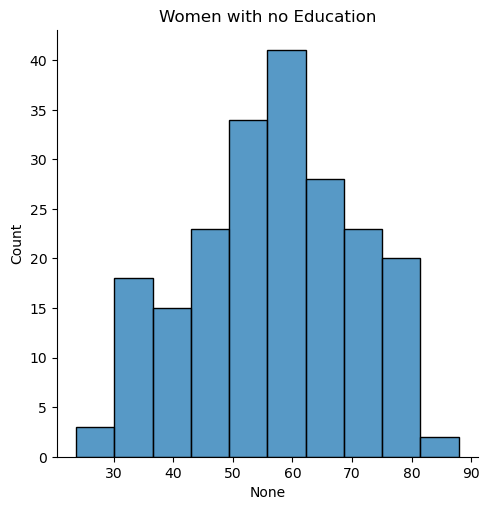

C:\myanaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


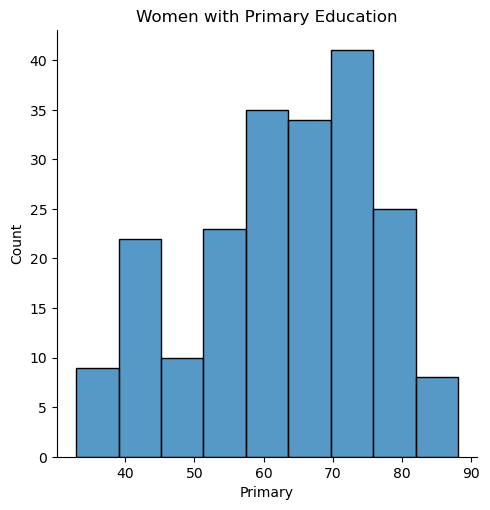

C:\myanaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


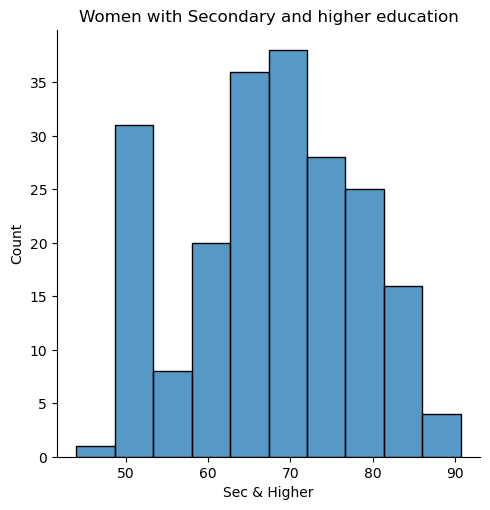

In [326]:
sns.displot(mlrcare, x='None')
plt.title("Women with no Education")
plt.show()
sns.displot(mlrcare, x='Primary')
plt.title("Women with Primary Education")
plt.show()
sns.displot(mlrcare, x='Sec & Higher')
plt.title("Women with Secondary and higher education")
plt.show()

* Rural Area

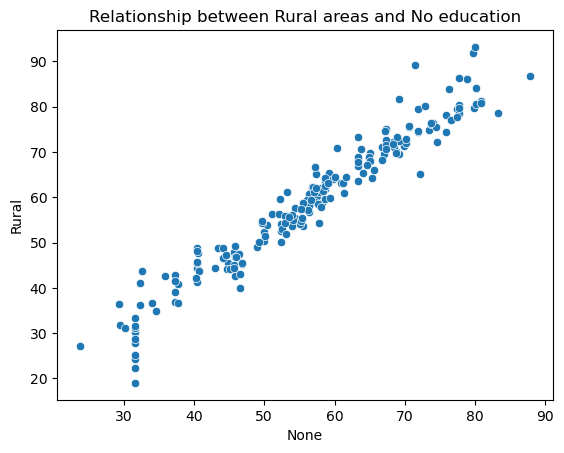

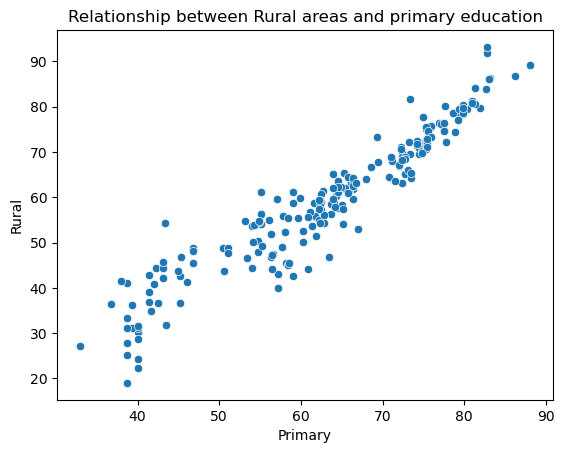

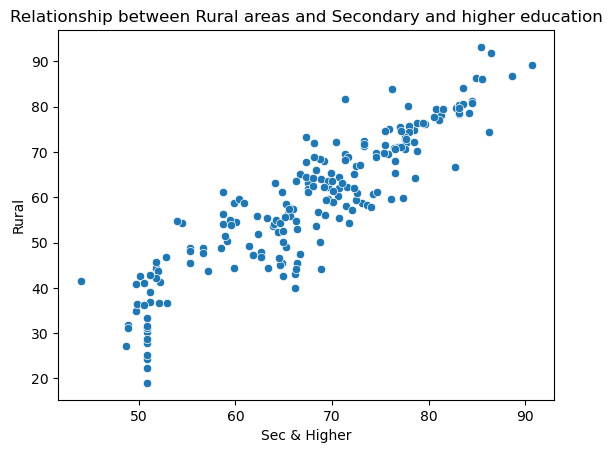

In [327]:
sns.scatterplot(data=mlrcare, x="None", y="Rural")
plt.title("Relationship between Rural areas and No education")
plt.show()
sns.scatterplot(data=mlrcare, x="Primary", y="Rural")
plt.title("Relationship between Rural areas and primary education")
plt.show()
sns.scatterplot(data=mlrcare, x="Sec & Higher", y="Rural")
plt.title("Relationship between Rural areas and Secondary and higher education")
plt.show()

* Urban Area

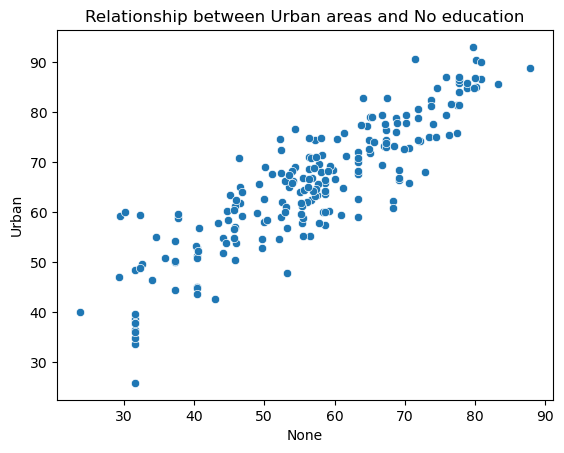

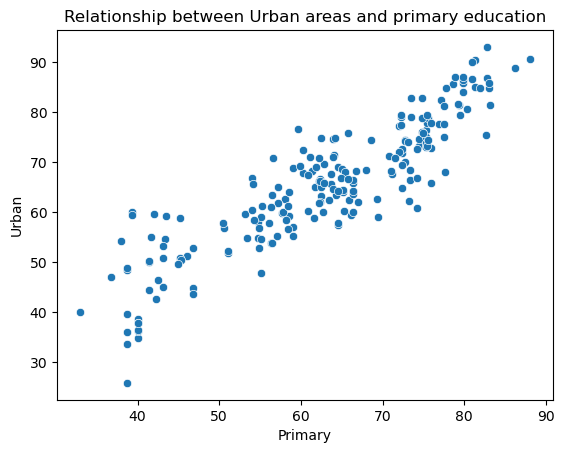

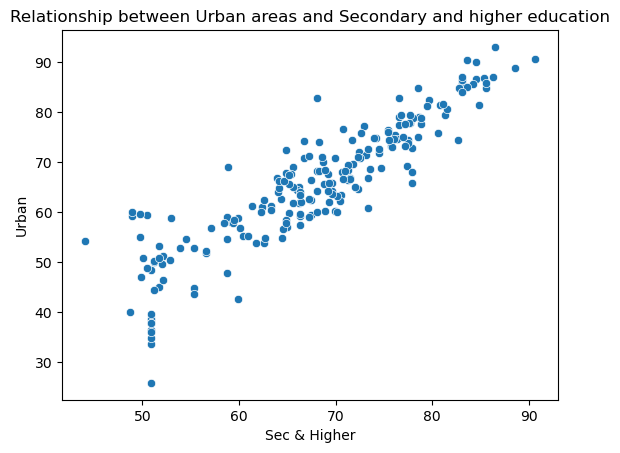

In [328]:
sns.scatterplot(data=mlrcare, x="None", y="Urban")
plt.title("Relationship between Urban areas and No education")
plt.show()
sns.scatterplot(data=mlrcare, x="Primary", y="Urban")
plt.title("Relationship between Urban areas and primary education")
plt.show()
sns.scatterplot(data=mlrcare, x="Sec & Higher", y="Urban")
plt.title("Relationship between Urban areas and Secondary and higher education")
plt.show()

# MLRDIAG

In [329]:
mlrdiag

,ISO,Countries,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2022),Year,Short Source,Long Source,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,7.9,NaN,NaN,8.5,6.0,3.9,9.4,9.6,10.5,5.9,NaN,NaN,NaN
1,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2011,MIS 2011,Malaria Indicator Survey 2011,26.0,24.8,27.0,16.4,46.0,7.9,12.8,18.6,33.3,41.6,NaN,NaN,NaN
2,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2016,DHS 2015-2016,Demographic and Health Survey 2015-2016,34.3,35.5,33.0,23.4,42.8,19.7,29.2,38.9,44.1,52.7,NaN,NaN,NaN
3,BDI,Burundi,Eastern and Southern Africa,ESARO,Low income,2010,DHS 2010,Demographic and Health Survey 2010,27.0,26.5,27.6,25.6,47.8,18.7,24.9,27.4,31.8,36.3,NaN,NaN,NaN
4,BDI,Burundi,Eastern and Southern Africa,ESARO,Low income,2012,MIS 2012,Malaria Indicator Survey 2012,28.3,29.2,27.5,27.9,34.7,29.9,24.4,30.6,27.6,30.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,ZMB,Zambia,Eastern and Southern Africa,ESARO,Low income,2019,DHS 2018-2019,Demographic and Health Survey 2018-2019,63.0,64.4,61.4,67.4,52.0,67.1,69.9,68.5,47.0,51.5,68.2,65.4,57.6
148,ZWE,Zimbabwe,Eastern and Southern Africa,ESARO,Lower middle income,2011,DHS 2010-2011,Demographic and Health Survey 2010-2011,7.0,8.0,7.0,8.0,5.0,5.0,14.0,5.0,2.0,2.0,NaN,NaN,NaN
149,ZWE,Zimbabwe,Eastern and Southern Africa,ESARO,Lower middle income,2014,MICS 2014,Multiple Indicator Cluster Survey 2014,14.1,13.4,14.9,16.3,6.6,14.9,17.7,16.5,12.9,5.1,NaN,NaN,NaN
150,ZWE,Zimbabwe,Eastern and Southern Africa,ESARO,Lower middle income,2015,DHS 2015,Demographic and Health Survey 2015,12.7,13.7,11.8,14.7,8.7,16.2,12.5,12.8,9.2,12.9,NaN,NaN,NaN


In [330]:
mlrdiag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ISO                             152 non-null    object 
 1   Countries                       152 non-null    object 
 2   UNICEF Reporting Region         152 non-null    object 
 3   UNICEF Programme Region         152 non-null    object 
 4   World Bank Income Group (2022)  152 non-null    object 
 5   Year                            152 non-null    int64  
 6   Short Source                    152 non-null    object 
 7   Long Source                     152 non-null    object 
 8   National                        150 non-null    float64
 9   Male                            121 non-null    float64
 10  Female                          121 non-null    float64
 11  Rural                           147 non-null    float64
 12  Urban                           147 

In [331]:
mlrdiag.isna().sum()

ISO                                 0
Countries                           0
UNICEF Reporting Region             0
UNICEF Programme Region             0
World Bank Income Group (2022)      0
Year                                0
Short Source                        0
Long Source                         0
National                            2
Male                               31
Female                             31
Rural                               5
Urban                               5
Poorest                             7
Second                              8
Middle                              8
Fourth                              9
Richest                            10
None                              119
Primary                           117
Sec & Higher                      116
dtype: int64

In [332]:
# Columns to impute
columns_to_impute = ['National', 'Male', 'Female', 'Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest', 'None', 'Primary', 'Sec & Higher']

#Create a KNN Imputer object
imputer = KNNImputer(n_neighbors=5, weights='uniform')

#Fit and transform the data
imputed_data = imputer.fit_transform(mlrdiag[columns_to_impute])

# Convert the imputed data back to a pandas DataFrame
imputed_data = pd.DataFrame(imputed_data, columns=columns_to_impute)

# Replace the original columns with the imputed data
mlrdiag[columns_to_impute] = imputed_data

In [333]:
mlrdiag.isna().sum()

ISO                               0
Countries                         0
UNICEF Reporting Region           0
UNICEF Programme Region           0
World Bank Income Group (2022)    0
Year                              0
Short Source                      0
Long Source                       0
National                          0
Male                              0
Female                            0
Rural                             0
Urban                             0
Poorest                           0
Second                            0
Middle                            0
Fourth                            0
Richest                           0
None                              0
Primary                           0
Sec & Higher                      0
dtype: int64

In [334]:
mlrdiag.head()

,ISO,Countries,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2022),Year,Short Source,Long Source,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,7.9,7.16,7.58,8.5,6.0,3.9,9.4,9.6,10.5,5.9,7.96,7.80,11.26
1,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2011,MIS 2011,Malaria Indicator Survey 2011,26.0,24.80,27.00,16.4,46.0,7.9,12.8,18.6,33.3,41.6,21.60,24.74,31.14
2,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2016,DHS 2015-2016,Demographic and Health Survey 2015-2016,34.3,35.50,33.00,23.4,42.8,19.7,29.2,38.9,44.1,52.7,33.50,36.40,44.30
3,BDI,Burundi,Eastern and Southern Africa,ESARO,Low income,2010,DHS 2010,Demographic and Health Survey 2010,27.0,26.50,27.60,25.6,47.8,18.7,24.9,27.4,31.8,36.3,23.32,24.74,31.14
4,BDI,Burundi,Eastern and Southern Africa,ESARO,Low income,2012,MIS 2012,Malaria Indicator Survey 2012,28.3,29.20,27.50,27.9,34.7,29.9,24.4,30.6,27.6,30.1,28.08,28.18,30.96


In [335]:
mlrdiag = mlrdiag.drop(columns= ["ISO","UNICEF Programme Region",
                                 "World Bank Income Group (2022)","Long Source","Short Source"], axis=1)
# Rename the UNICEF Reporting region column to Region
mlrdiag.rename(columns={'UNICEF Reporting Region':'Region'}, inplace=True)

In [336]:
mlrdiag.head()

,Countries,Region,Year,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,Afghanistan,South Asia,2015,7.9,7.16,7.58,8.5,6.0,3.9,9.4,9.6,10.5,5.9,7.96,7.80,11.26
1,Angola,Eastern and Southern Africa,2011,26.0,24.80,27.00,16.4,46.0,7.9,12.8,18.6,33.3,41.6,21.60,24.74,31.14
2,Angola,Eastern and Southern Africa,2016,34.3,35.50,33.00,23.4,42.8,19.7,29.2,38.9,44.1,52.7,33.50,36.40,44.30
3,Burundi,Eastern and Southern Africa,2010,27.0,26.50,27.60,25.6,47.8,18.7,24.9,27.4,31.8,36.3,23.32,24.74,31.14
4,Burundi,Eastern and Southern Africa,2012,28.3,29.20,27.50,27.9,34.7,29.9,24.4,30.6,27.6,30.1,28.08,28.18,30.96


In [337]:
sorted(mlrcare["Year"].unique())

[2004,
 2006,
 2007,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [338]:
sorted(mlrcare["Countries"].unique())

['Afghanistan',
 'Albania',
 'Angola',
 'Argentina',
 'Armenia',
 'Bangladesh',
 'Belarus',
 'Belize',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Cuba',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Dominican Republic',
 'Egypt',
 'Equatorial Guinea',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'India',
 'Indonesia',
 'Iraq',
 'Jordan',
 'Kenya',
 'Kiribati',
 'Kosovo',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Maldives',
 'Mali',
 'Marshall Islands',
 'Mauritania',
 'Montenegro',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nauru',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Sao Tome and 

In [339]:
sorted(mlrcare["Region"].unique())

['East Asia and Pacific',
 'Eastern Europe and Central Asia',
 'Eastern and Southern Africa',
 'Latin America and Caribbean',
 'Middle East and North Africa',
 'Not Classified',
 'South Asia',
 'Sub-Saharan Africa',
 'West and Central Africa']

In [340]:
mlrdiag.describe()

,Year,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,2014.657895,24.378553,24.384868,23.915395,23.106974,27.624868,20.857500,22.690658,24.404342,25.984737,29.569737,22.074211,23.577237,27.463026
std,3.543682,14.446583,14.116323,13.931876,14.692616,15.914761,14.603518,14.877917,15.317259,15.574487,16.647788,12.310773,13.063716,13.564450
min,2009.000000,3.000000,4.300000,5.300000,2.700000,0.100000,0.600000,1.600000,1.900000,2.000000,0.500000,4.800000,5.000000,4.200000
25%,2011.750000,13.300000,13.790000,12.550000,12.900000,13.845000,10.200000,12.300000,12.750000,14.700000,15.800000,12.180000,12.775000,16.140000
50%,2015.000000,21.200000,22.500000,19.200000,18.450000,25.600000,16.100000,18.100000,21.350000,22.500000,28.200000,19.050000,20.830000,24.240000
75%,2018.000000,34.150000,32.875000,33.300000,32.225000,40.750000,29.425000,30.825000,34.100000,35.725000,41.625000,33.125000,33.520000,38.180000
max,2021.000000,66.400000,64.400000,61.400000,67.400000,81.100000,68.200000,71.500000,68.500000,81.700000,95.000000,68.200000,65.400000,65.400000


# MLRDIAG-EDA

C:\myanaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


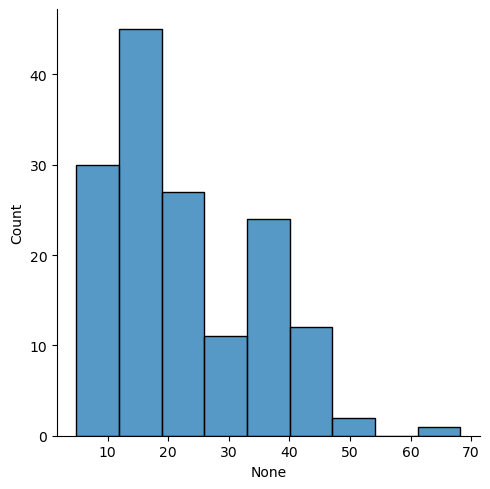

C:\myanaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


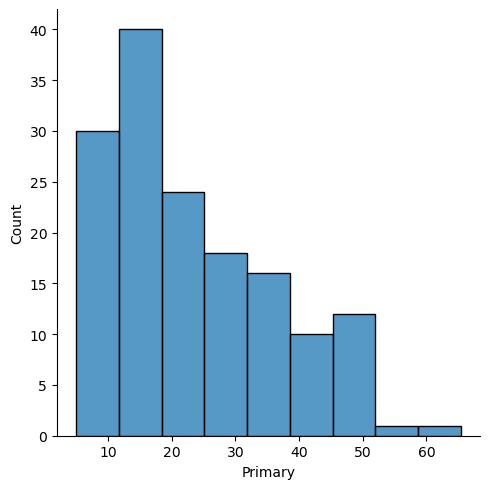

C:\myanaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


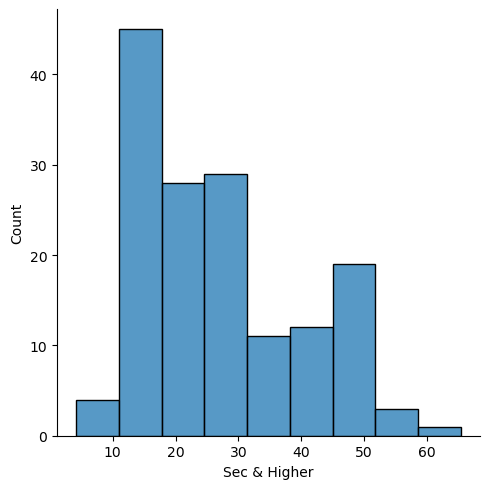

In [341]:
sns.displot(data=mlrdiag,x="None")
plt.show()
sns.displot(data=mlrdiag,x="Primary")
plt.show()
sns.displot(data=mlrdiag,x="Sec & Higher")
plt.show()

* Rural Area

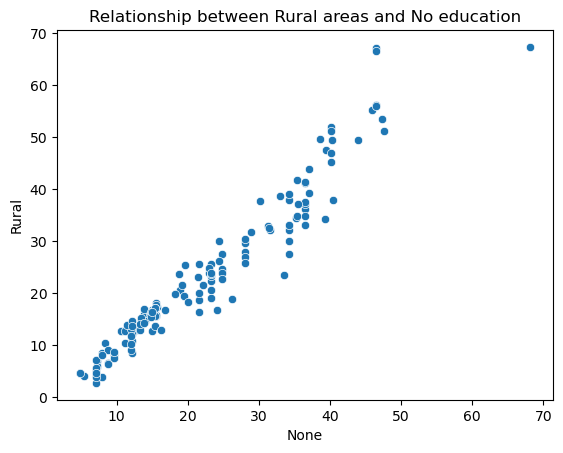

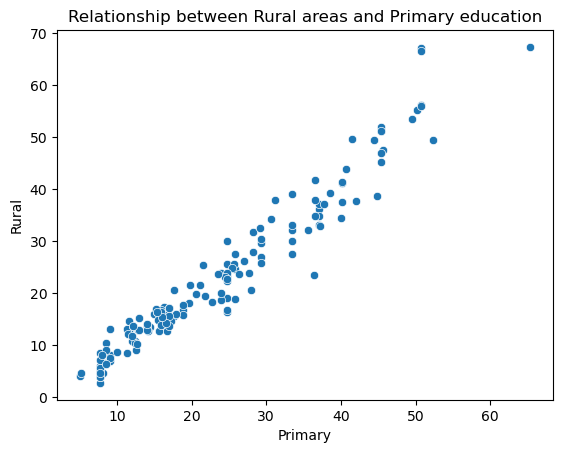

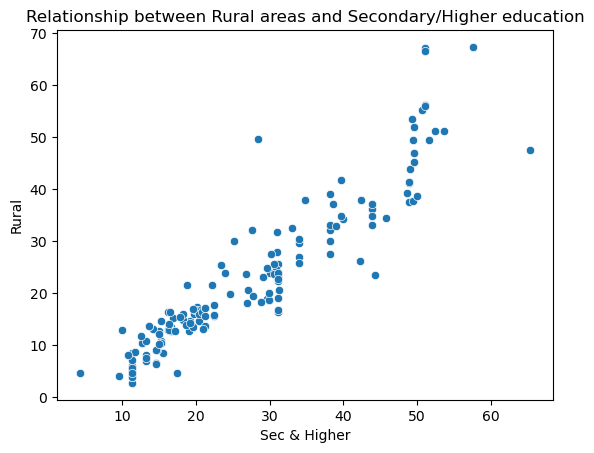

In [342]:
sns.scatterplot(data=mlrdiag, x="None", y="Rural")
plt.title("Relationship between Rural areas and No education")
plt.show()
sns.scatterplot(data=mlrdiag, x="Primary", y="Rural")
plt.title("Relationship between Rural areas and Primary education")
plt.show()
sns.scatterplot(data=mlrdiag, x="Sec & Higher", y="Rural")
plt.title("Relationship between Rural areas and Secondary/Higher education")
plt.show()

* Urban Area

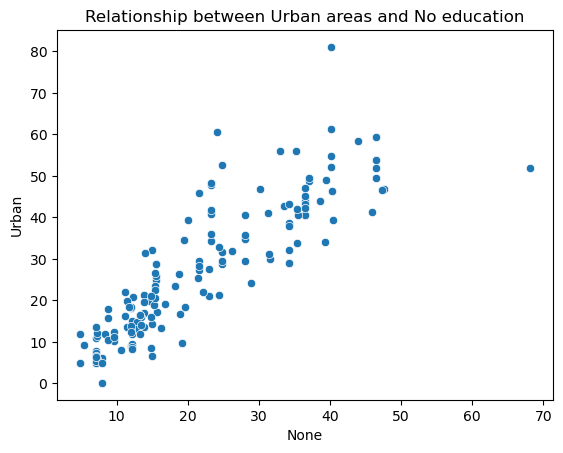

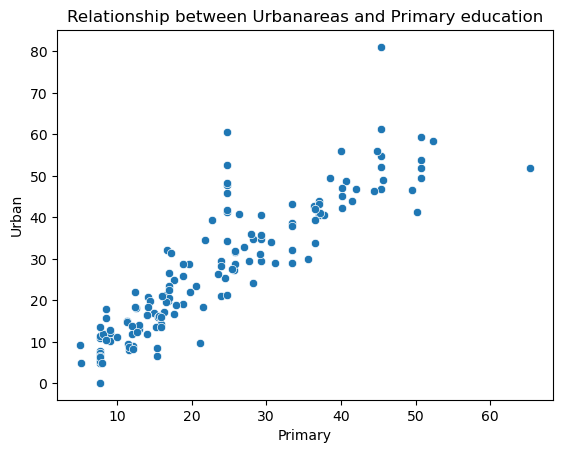

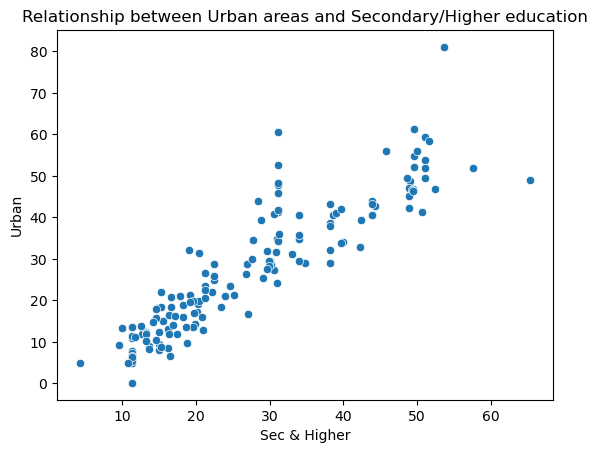

In [343]:
sns.scatterplot(data=mlrdiag, x="None", y="Urban")
plt.title("Relationship between Urban areas and No education")
plt.show()
sns.scatterplot(data=mlrdiag, x="Primary", y="Urban")
plt.title("Relationship between Urbanareas and Primary education")
plt.show()
sns.scatterplot(data=mlrdiag, x="Sec & Higher", y="Urban")
plt.title("Relationship between Urban areas and Secondary/Higher education")
plt.show()

# MLRACT

In [344]:
mlract

,ISO,Countries,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2022),Year,Short Source,Long Source,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,4.4,5.3,3.6,6.6,0.2,5.9,11.1,2.2,3.9,NaN,NaN,NaN,NaN
1,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2007,MIS 2006-2007,Malaria Indicator Survey 2006-2007,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2011,MIS 2011,Malaria Indicator Survey 2011,21.7,20.8,22.5,15.2,35.2,6.1,12.0,15.9,26.3,36.0,NaN,NaN,NaN
3,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2016,DHS 2015-2016,Demographic and Health Survey 2015-2016,76.7,81.6,68.7,68.7,82.1,62.9,70.9,79.3,78.6,98.1,NaN,NaN,NaN
4,BDI,Burundi,Eastern and Southern Africa,ESARO,Low income,2010,DHS 2010,Demographic and Health Survey 2010,69.5,70.3,68.4,70.8,42.3,69.7,77.4,68.1,65.6,63.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,ZMB,Zambia,Eastern and Southern Africa,ESARO,Low income,2012,MIS 2012,Malaria Indicator Survey 2012,85.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,ZMB,Zambia,Eastern and Southern Africa,ESARO,Low income,2014,DHS 2013-2014,Demographic and Health Survey 2013-2014,90.4,91.1,89.7,93.4,80.0,93.9,93.1,90.8,83.3,73.4,NaN,NaN,NaN
161,ZMB,Zambia,Eastern and Southern Africa,ESARO,Low income,2019,DHS 2018-2019,Demographic and Health Survey 2018-2019,33.8,35.1,32.5,41.6,14.6,43.2,41.8,41.0,11.1,12.5,43.7,39.7,21.4
162,ZWE,Zimbabwe,Eastern and Southern Africa,ESARO,Lower middle income,2011,DHS 2010-2011,Demographic and Health Survey 2010-2011,49.1,52.1,46.6,43.9,56.4,100.0,42.7,NaN,100.0,44.7,NaN,NaN,NaN


In [345]:
mlract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ISO                             164 non-null    object 
 1   Countries                       164 non-null    object 
 2   UNICEF Reporting Region         164 non-null    object 
 3   UNICEF Programme Region         164 non-null    object 
 4   World Bank Income Group (2022)  164 non-null    object 
 5   Year                            164 non-null    int64  
 6   Short Source                    164 non-null    object 
 7   Long Source                     164 non-null    object 
 8   National                        160 non-null    float64
 9   Male                            118 non-null    float64
 10  Female                          120 non-null    float64
 11  Rural                           131 non-null    float64
 12  Urban                           123 

In [346]:
mlract.isna().sum()

ISO                                 0
Countries                           0
UNICEF Reporting Region             0
UNICEF Programme Region             0
World Bank Income Group (2022)      0
Year                                0
Short Source                        0
Long Source                         0
National                            4
Male                               46
Female                             44
Rural                              33
Urban                              41
Poorest                            46
Second                             45
Middle                             51
Fourth                             49
Richest                            52
None                              136
Primary                           137
Sec & Higher                      140
dtype: int64

In [347]:
# Columns to impute
columns_to_impute = ['National', 'Male', 'Female', 'Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest', 'None', 'Primary', 'Sec & Higher']

#Create a KNN Imputer object
imputer = KNNImputer(n_neighbors=5, weights='uniform')

#Fit and transform the data
imputed_data = imputer.fit_transform(mlract[columns_to_impute])

# Convert the imputed data back to a pandas DataFrame
imputed_data = pd.DataFrame(imputed_data, columns=columns_to_impute)

# Replace the original columns with the imputed data
mlract[columns_to_impute] = imputed_data

In [348]:
mlract.isna().sum()

ISO                               0
Countries                         0
UNICEF Reporting Region           0
UNICEF Programme Region           0
World Bank Income Group (2022)    0
Year                              0
Short Source                      0
Long Source                       0
National                          0
Male                              0
Female                            0
Rural                             0
Urban                             0
Poorest                           0
Second                            0
Middle                            0
Fourth                            0
Richest                           0
None                              0
Primary                           0
Sec & Higher                      0
dtype: int64

In [349]:
mlract = mlract.drop(columns= ["ISO","UNICEF Programme Region",
                                 "World Bank Income Group (2022)","Long Source","Short Source"], axis=1)
# Rename the UNICEF Reporting region column to Region
mlract.rename(columns={'UNICEF Reporting Region':'Region'}, inplace=True)

In [350]:
mlract.head()

,Countries,Region,Year,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,Afghanistan,South Asia,2015,4.4,5.30,3.60,6.60,0.20,5.9,11.10,2.20,3.90,5.18,3.82,10.14,7.88
1,Angola,Eastern and Southern Africa,2007,5.5,7.08,4.06,5.58,6.34,4.6,5.68,8.44,4.82,6.10,3.82,10.14,7.88
2,Angola,Eastern and Southern Africa,2011,21.7,20.80,22.50,15.20,35.20,6.1,12.00,15.90,26.30,36.00,20.20,21.98,22.94
3,Angola,Eastern and Southern Africa,2016,76.7,81.60,68.70,68.70,82.10,62.9,70.90,79.30,78.60,98.10,84.44,82.18,71.14
4,Burundi,Eastern and Southern Africa,2010,69.5,70.30,68.40,70.80,42.30,69.7,77.40,68.10,65.60,63.70,68.00,68.36,58.54


In [351]:
sorted(mlract["Year"].unique())

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [352]:
sorted(mlract["Region"].unique())

['East Asia and Pacific',
 'Eastern Europe and Central Asia',
 'Eastern and Southern Africa',
 'South Asia',
 'Sub-Saharan Africa',
 'West and Central Africa']

In [353]:
sorted(mlract["Countries"].unique())

['Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Djibouti',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'India',
 'Kenya',
 "Lao People's Democratic Republic",
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Papua New Guinea',
 'Rwanda',
 'Sao Tome and Principe',
 'Senegal',
 'Sierra Leone',
 'Somalia',
 'South Sudan',
 'Sudan',
 'Tajikistan',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'United Republic of Tanzania',
 'Viet Nam',
 'Zambia',
 'Zimbabwe']

# MLRACT-EDA

C:\myanaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


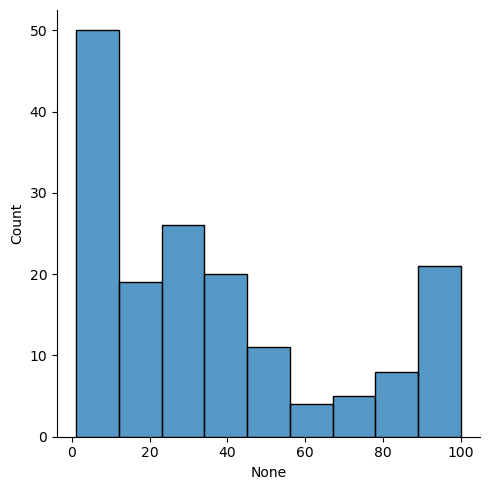

C:\myanaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


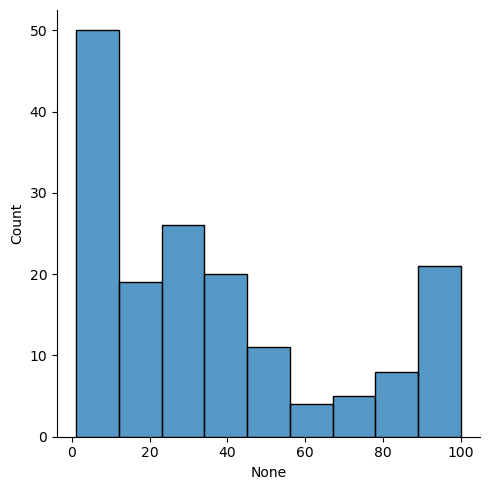

C:\myanaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


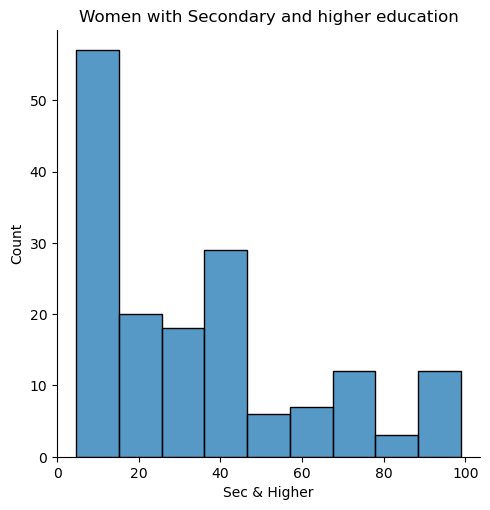

In [354]:
sns.displot(data=mlract,x="None")
plt.show()
sns.displot(data=mlract,x="None")
plt.show()
sns.displot(data=mlract,x="Sec & Higher")
plt.title("Women with Secondary and higher education")
plt.show()

* Rural Area

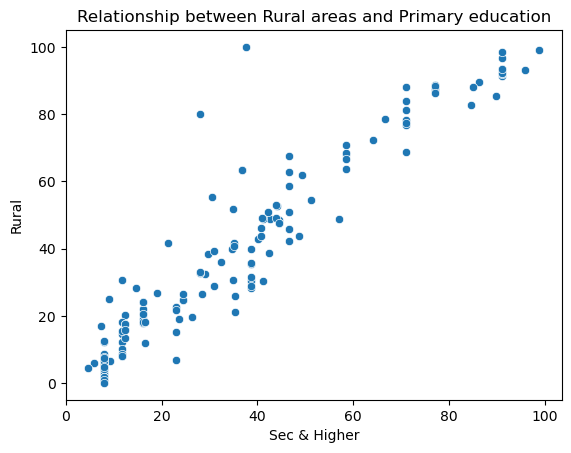

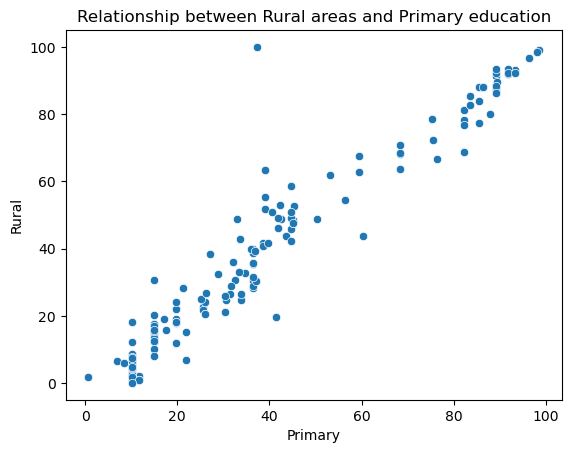

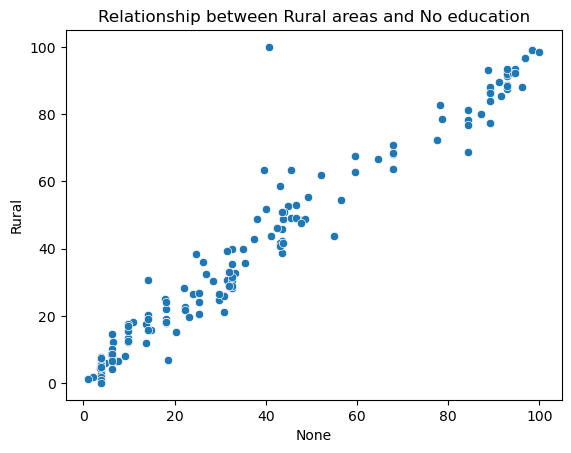

In [355]:
sns.scatterplot(data=mlract, x="Sec & Higher", y="Rural")
plt.title("Relationship between Rural areas and Primary education")
plt.show()
sns.scatterplot(data=mlract, x="Primary", y="Rural")
plt.title("Relationship between Rural areas and Primary education")
plt.show()
sns.scatterplot(data=mlract, x="None", y="Rural")
plt.title("Relationship between Rural areas and No education")
plt.show()

* Urban Area

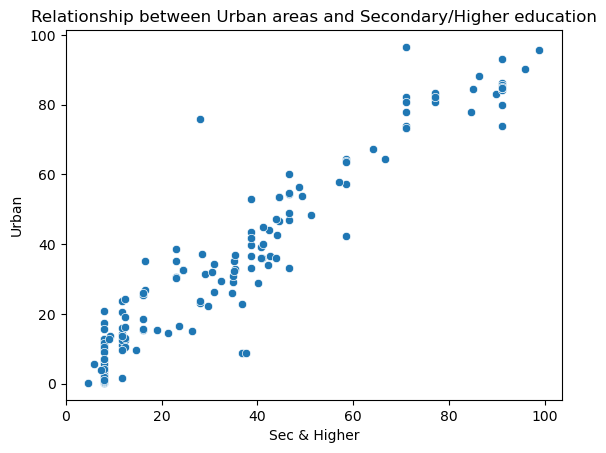

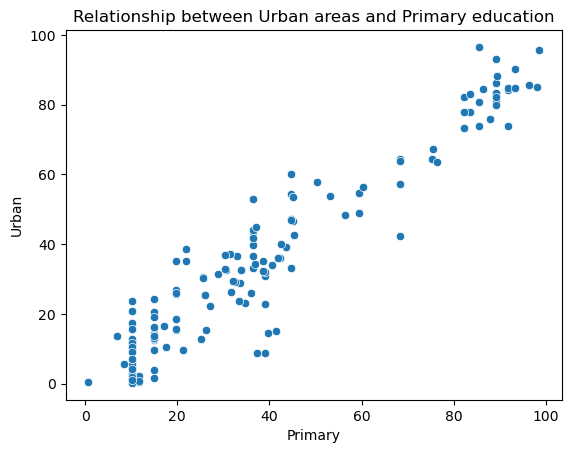

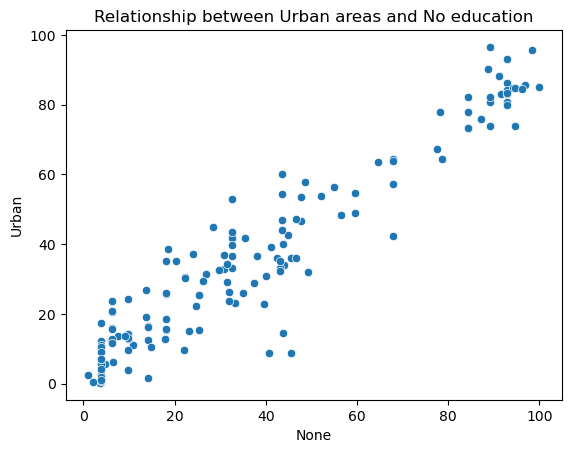

In [356]:
sns.scatterplot(data=mlract, x="Sec & Higher", y="Urban")
plt.title("Relationship between Urban areas and Secondary/Higher education")
plt.show()
sns.scatterplot(data=mlract, x="Primary", y="Urban")
plt.title("Relationship between Urban areas and Primary education")
plt.show()
sns.scatterplot(data=mlract, x="None", y="Urban")
plt.title("Relationship between Urban areas and No education")
plt.show()

# Modelling

* Importing Libraries

In [386]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

* Data Preprocessing

In [358]:
columns_to_keep = ['National', 'Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest', 'None', 'Primary', 'Sec & Higher']

# Select these columns from each DataFrame
mlrcare_selected = mlrcare[columns_to_keep]
mlrdiag_selected = mlrdiag[columns_to_keep]
mlract_selected = mlract[columns_to_keep]

merged_df = pd.merge(mlrcare_selected, mlrdiag_selected, how='outer')
merged_df = pd.merge(merged_df, mlract_selected, how='outer')


In [359]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   National      523 non-null    float64
 1   Rural         523 non-null    float64
 2   Urban         523 non-null    float64
 3   Poorest       523 non-null    float64
 4   Second        523 non-null    float64
 5   Middle        523 non-null    float64
 6   Fourth        523 non-null    float64
 7   Richest       523 non-null    float64
 8   None          523 non-null    float64
 9   Primary       523 non-null    float64
 10  Sec & Higher  523 non-null    float64
dtypes: float64(11)
memory usage: 45.1 KB


In [360]:
merged_df.head()

,National,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,63.2,62.3,65.9,61.10,62.00,61.10,67.70,64.10,58.64,66.34,69.64
1,62.1,63.1,59.5,56.60,67.20,59.90,63.50,63.60,60.90,66.10,67.50
2,50.8,42.6,57.1,36.90,47.30,56.70,59.70,63.30,45.88,59.00,64.96
3,71.2,69.6,73.2,67.14,73.92,71.52,73.40,77.16,67.00,74.42,75.76
4,59.6,53.6,66.9,44.30,66.30,63.60,66.24,72.44,55.46,54.00,63.90


In [361]:
merged_df.isna().sum()

National        0
Rural           0
Urban           0
Poorest         0
Second          0
Middle          0
Fourth          0
Richest         0
None            0
Primary         0
Sec & Higher    0
dtype: int64

In [362]:
scaler = MinMaxScaler()
scaler.fit(merged_df)

MinMaxScaler()

In [363]:
x = merged_df.drop(columns = "National")
y = merged_df["National"]

In [364]:
x

,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,62.30,65.90,61.10,62.00,61.10,67.70,64.10,58.64,66.34,69.64
1,63.10,59.50,56.60,67.20,59.90,63.50,63.60,60.90,66.10,67.50
2,42.60,57.10,36.90,47.30,56.70,59.70,63.30,45.88,59.00,64.96
3,69.60,73.20,67.14,73.92,71.52,73.40,77.16,67.00,74.42,75.76
4,53.60,66.90,44.30,66.30,63.60,66.24,72.44,55.46,54.00,63.90
...,...,...,...,...,...,...,...,...,...,...
518,86.42,82.26,88.92,87.86,85.00,82.44,77.84,89.28,89.20,77.00
519,93.40,80.00,93.90,93.10,90.80,83.30,73.40,92.90,89.20,91.16
520,41.60,14.60,43.20,41.80,41.00,11.10,12.50,43.70,39.70,21.40
521,43.90,56.40,100.00,42.70,64.08,100.00,44.70,54.92,60.40,48.74


In [365]:
y

0      63.2
1      62.1
2      50.8
3      71.2
4      59.6
       ... 
518    85.6
519    90.4
520    33.8
521    49.1
522    78.8
Name: National, Length: 523, dtype: float64

In [371]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [374]:
y_pred = model.predict(x_test)

In [384]:
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 3))
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred), 3))
print("R-squared:", round(r2_score(y_test, y_pred), 3))

Mean Squared Error: 5.149
Mean Absolute Error: 1.066
R-squared: 0.992


In [394]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE => {round(rmse, 3)}")

RMSE => 2.269


In [387]:
scores = cross_val_score(model, x_train, y_train, cv=5)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.99570672 0.99099831 0.99466241 0.99606661 0.99035396]


In [396]:
# Ridge Regression
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [399]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE => {round(rmse, 3)}")

RMSE => 2.269


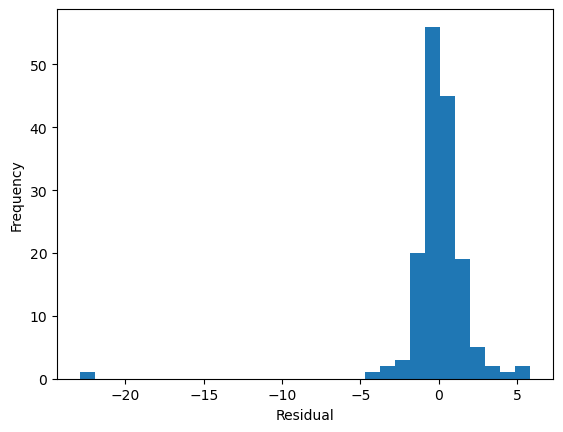

In [397]:
# Plotting residuals- Residuals are predicted errors
residuals = y_test - y_test_pred
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

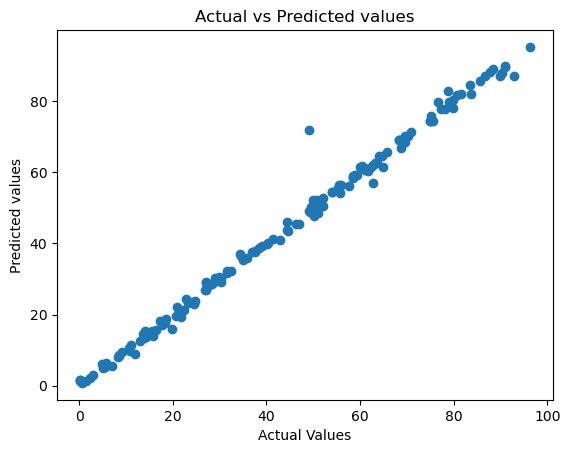

In [398]:
# Plotting actual vs predicted values
plt.scatter(y_test,y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.show()

In [1]:
model = Lasso(alpha=0.001,max_iter=10000)
model.fit(x_train, y_train)

NameError: name 'Lasso' is not defined

In [425]:
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

model_weights = get_weights_df(model, x_train, 'Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')

final_weights = pd.merge(model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(model_weights, lasso_weights_df, on='Features')

In [426]:
final_weights

,Features,Model_Weight,Lasso_Weight
0,Rural,-0.112051,-0.122179
1,Sec & Higher,-0.002299,-0.006088
2,Primary,-0.000000,-0.006619
3,Urban,0.021079,0.019359
4,Middle,0.160801,0.164063
5,None,0.162717,0.170085
6,Richest,0.175497,0.178402
7,Fourth,0.179549,0.182253
8,Second,0.203147,0.206662
9,Poorest,0.221491,0.224117


# Rural, Primary, Sec & Higher: For these features, both models assigned negative weights, indicating that an increase in these features might lead to a decrease in the target variable.
# Urban, Middle, None, Richest, Fourth, Second, Poorest: These features have positive weights in both models, indicating that an increase in these features is associated with an increase in the target variable. The magnitude of the weights gives an indication of the strength of this relationship, with larger absolute values indicating a stronger relationship..

# All features are contributing to the prediction, but some have more impact than others.
# The Lasso regression model has not eliminated any features, indicating that all features are relevant for prediction.